In [5]:
!pip install seaborn

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import scikitplot as skplt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_validate

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import linear_model

from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

## using the cardiovascular data we need to predict weather the patient can have CHD coronary heart disease

## follwoing are the features in the dataset

### age --Contineous variable  Representing the age of a person  

### education -- categorical data depicting the levels of education from 1-4

### Sex--  gender categorical variable

### is_smoking-- categorical data weather a person is smoker or non smoker

### cigrattes_perDay-- contineous  values 

### Bpmeds-- categorical weather a person is on anti hypertensive medication


### prevalentStroke-- categorical data weather the person suffered a stroke or history of stroke

### PrevalentHyp-- categorical data -- history of hypertension

### Diabetes -- categorical variable suffering from diabetes

### totChol - contineous variable -- cholestrol levels

### SysBP - contineous variable  -systolic blood pressure upto 120 mm/hg is considered normal

### diaBP - contineous variable - Diastolic blood pressure upto 80 mm/hg is normal 

### heartRate - contineous variable - 72 is ideal below 60 is bradicardia and above 100 tachie cardia 

### glucose -contineous variable - showing blood sugar levels

### BMI - contineous variable - Body Mass Index upto  25 is normal obove and below 30 is over weight and 30-35 considered obese

### TenYearCHD - categorical variable - target variable 

In [7]:
df=pd.read_csv('data_cardiovascular_risk.csv')

In [8]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [9]:
df.size

57630

In [10]:
df.shape # no of recoreds , features

(3390, 17)

In [11]:
df.dtypes # the data types of each feature

id                   int64
age                  int64
education          float64
sex                 object
is_smoking          object
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [12]:
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


## Handling the Null Values

In [13]:
df.isnull().sum()# null values feature wise

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

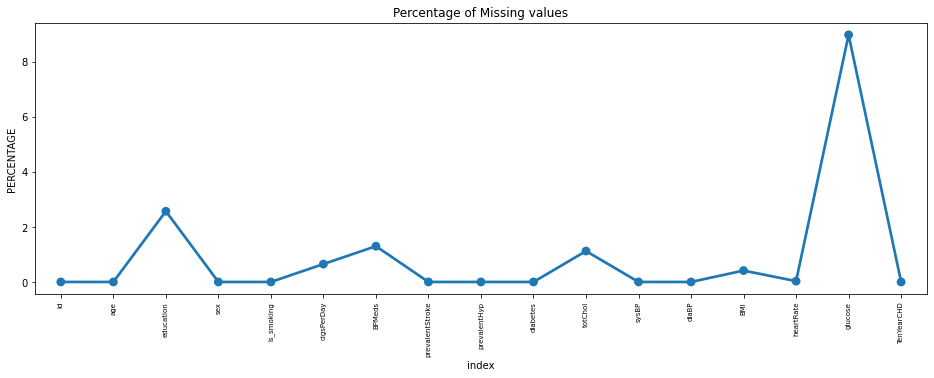

In [14]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [15]:
df.isnull().sum().sum() # total null values in the dataset


510

In [16]:
# 1. education -- we will consider first with 87 null values

df.education.value_counts(normalize=True)

# there are 1-4 categories since 42% has class 1 education so we can take mode value to fill the null value for this feature

#though the feature seems to be of floating type but this is a categorical feature with 4 classes so we will take mode

1.0    0.421132
2.0    0.299728
3.0    0.166213
4.0    0.112928
Name: education, dtype: float64

In [17]:
mode=df['education'].mode().values[0]
df['education'].fillna(value=mode, inplace=True)

In [18]:
df['education'].isnull().sum()

0

In [19]:
#2. cigsPerDay is the feature with 22 NaN values lets see the Feature

df['cigsPerDay'].value_counts(normalize=True) # its a contineous feature

# 50% are Non Smokers so we can consider these 22 recored as Non Smokers

0.0     0.505641
20.0    0.179929
30.0    0.052257
15.0    0.051069
10.0    0.031473
9.0     0.030879
5.0     0.030582
3.0     0.023456
40.0    0.018409
1.0     0.014252
25.0    0.013064
43.0    0.012470
35.0    0.005048
2.0     0.005048
6.0     0.004157
8.0     0.002969
7.0     0.002375
60.0    0.002375
18.0    0.002078
4.0     0.002078
50.0    0.001781
17.0    0.001485
23.0    0.001485
11.0    0.001188
12.0    0.000891
13.0    0.000891
19.0    0.000594
16.0    0.000594
45.0    0.000594
14.0    0.000297
70.0    0.000297
38.0    0.000297
Name: cigsPerDay, dtype: float64

In [20]:
df['cigsPerDay'].fillna(0,inplace=True)

In [21]:
df['cigsPerDay'].isnull().sum()

0

In [22]:
# 3. BPMeds 

df['BPMeds'].value_counts(normalize=True)
#more than 97% are not on BP medication and almost 3% are on medication

0.0    0.970114
1.0    0.029886
Name: BPMeds, dtype: float64

In [23]:
df['BPMeds'].isnull().sum() #44 NaN values

44

In [24]:
df['BPMeds'].fillna(0,inplace=True)

In [25]:
df['BPMeds'].isnull().sum()

0

In [26]:
#4. totChol -- these are cholestrol levels 
df['totChol'].value_counts()

240.0    65
210.0    51
220.0    48
260.0    46
232.0    45
         ..
137.0     1
113.0     1
392.0     1
353.0     1
364.0     1
Name: totChol, Length: 240, dtype: int64

In [27]:
df['totChol'].mode()

0    240.0
dtype: float64

In [28]:
df['totChol'].mean()

237.07428400954655

In [29]:
df['totChol'].median()

234.0

### the mean , median , mode values are closer and normal range is upto 200 , all measures shows marginal rise so we can consider mean values to be imputed

In [30]:
# we can fill with mean value

chol_mean=df['totChol'].mean()
df['totChol'].fillna(chol_mean,inplace=True)

In [31]:
df['BMI'].isnull().sum()

14

In [32]:
df['BMI'].value_counts()

22.91    17
22.54    16
22.19    15
23.48    12
25.09    12
         ..
19.54     1
19.87     1
35.01     1
21.29     1
31.09     1
Name: BMI, Length: 1259, dtype: int64

In [33]:
BMI_mean=df['BMI'].mean()

In [34]:
df['BMI'].fillna(BMI_mean,inplace=True) # imputing mean values for missing BMI

In [35]:
df['BMI'].isnull().sum()

0

In [36]:
df['heartRate'].value_counts()

75.0     442
80.0     298
70.0     241
85.0     191
72.0     184
        ... 
47.0       1
143.0      1
51.0       1
140.0      1
97.0       1
Name: heartRate, Length: 68, dtype: int64

In [37]:
hr_mean=round(df['heartRate'].mean(),0) # only 1 NaN value

In [38]:
df['heartRate'].fillna(hr_mean,inplace=True) # filling NaN value with mean

In [39]:
df['glucose'].isnull().sum() # 304 Nan values

304

In [40]:
df['glucose'].value_counts()

75.0     149
83.0     135
70.0     123
77.0     122
80.0     118
        ... 
191.0      1
119.0      1
43.0       1
256.0      1
274.0      1
Name: glucose, Length: 132, dtype: int64

In [41]:
df['glucose'].mean()

82.08651976668827

In [42]:
df['glucose'].median()

78.0

In [43]:
#  mean and median are in normal range , we can replace them by mean

mean_glucose=df['glucose'].mean()

In [44]:
df['glucose'].fillna(mean_glucose,inplace=True)

In [45]:
df['glucose'].isnull().sum()

0

## all Null values treated!!

In [46]:
df.isnull().sum().sum()

0

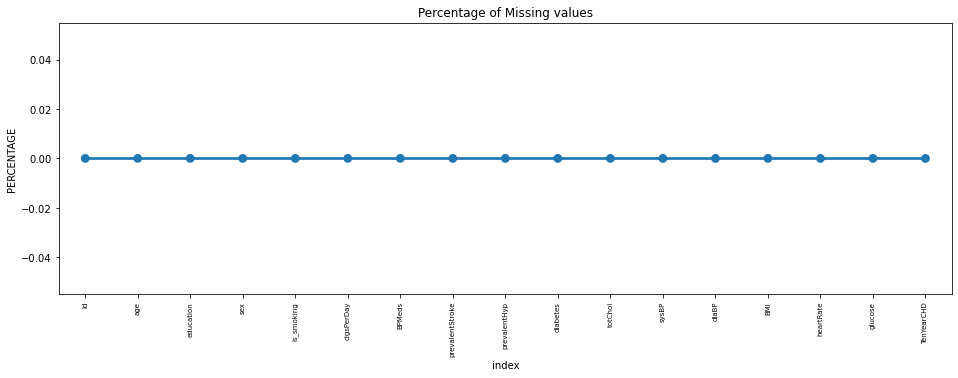

In [47]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [48]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0


In [49]:
numeric_variables=['age','totChol','sysBP','diaBP','BMI','heartRate','glucose']

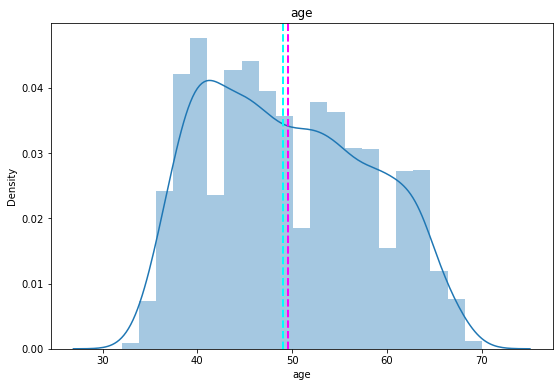

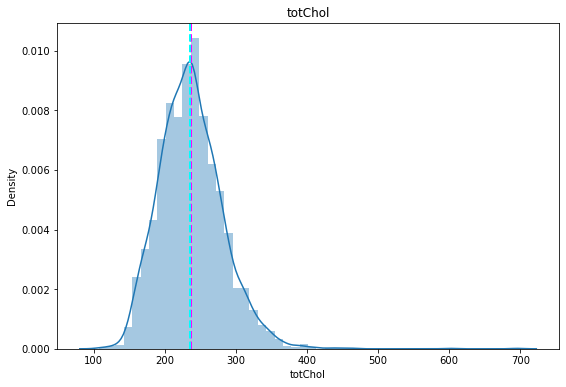

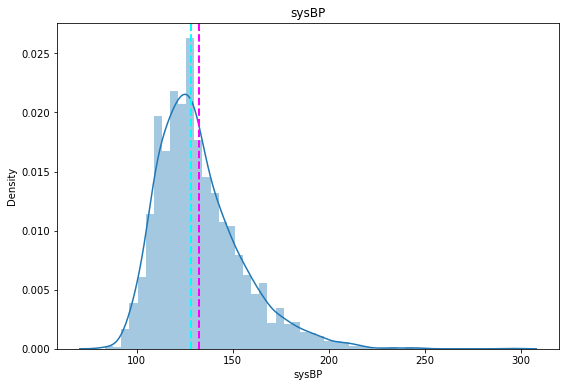

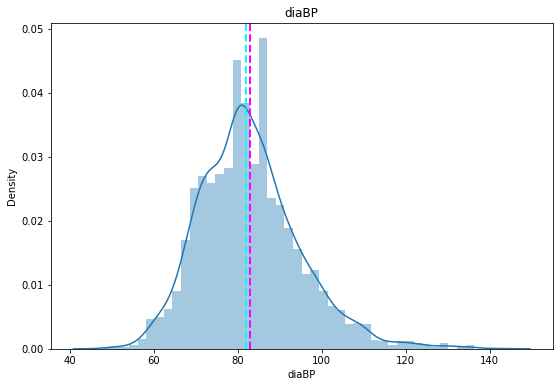

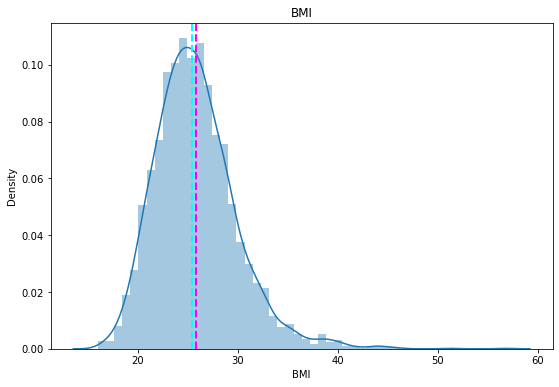

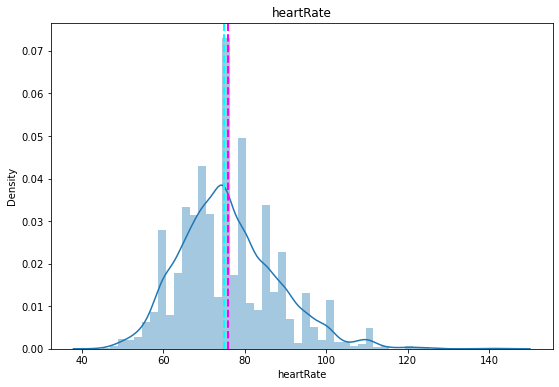

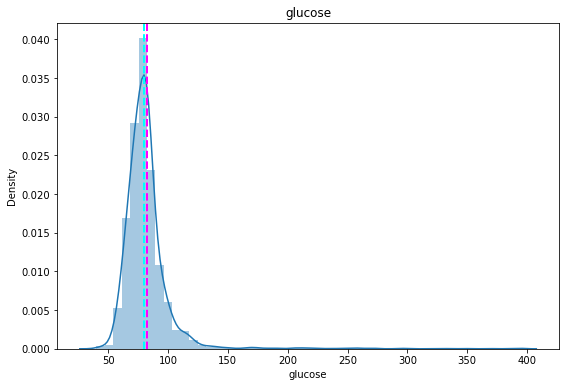

In [50]:
# plotting the distribution plot for each numerical feature 

for col in numeric_variables:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca() #Get Current Axis GCA and GCF get current figure
    feature = df[col]
    sns.distplot(feature)
    #feature.distplot(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

## all the numerical features are slightly right skewed , we can observe that the mean and median values are very much close to each other but not equal in all numerical features


In [51]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

<AxesSubplot:xlabel='glucose', ylabel='totChol'>

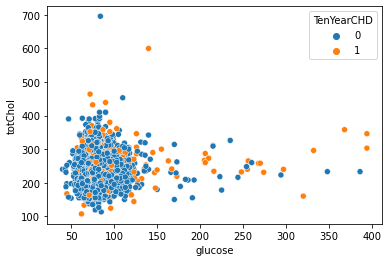

In [52]:
sns.scatterplot(x = 'glucose', y = 'totChol', hue = 'TenYearCHD', data = df)


### people with CHD has generally High Cholestrol  and high glucose levels  

<AxesSubplot:xlabel='age', ylabel='glucose'>

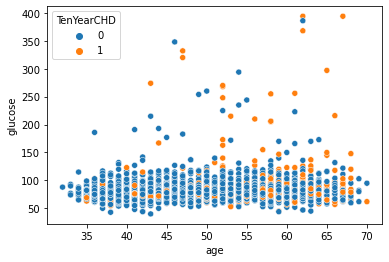

In [53]:
sns.scatterplot(y = 'glucose', x = 'age', hue = 'TenYearCHD', data = df)


### patients beyond the age of 50 have more chances to have diabetes and high glucose levels will lead to develop stenosis in the coronary arteries 

<AxesSubplot:xlabel='BMI', ylabel='sysBP'>

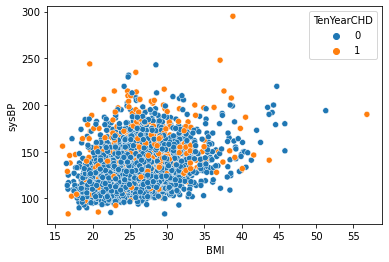

In [54]:
sns.scatterplot(y = 'sysBP', x = 'BMI', hue = 'TenYearCHD', data = df)


### Mostly the patient suffering from CHD has elevated Systolic BP with BMI above 25 

## The Categorical Variables

In [55]:
cat_var=['education','sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes']

In [56]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0


In [57]:
df['education'].value_counts(normalize=True)

1.0    0.435988
2.0    0.292035
3.0    0.161947
4.0    0.110029
Name: education, dtype: float64

In [58]:
df['is_smoking'].value_counts(normalize=True) # 49.7% are smokers and 50.23% non smokers are almost equal

NO     0.50236
YES    0.49764
Name: is_smoking, dtype: float64

In [59]:
df['sex'].value_counts(normalize=True) #56.72% are female and 43.27% are male

F    0.567257
M    0.432743
Name: sex, dtype: float64

In [60]:
df['BPMeds'].value_counts(normalize=True) # 2% are on BP medication

0.0    0.970501
1.0    0.029499
Name: BPMeds, dtype: float64

In [61]:
df['prevalentStroke'].value_counts() # few patients has stroke history like Mayocardial infract

0    3368
1      22
Name: prevalentStroke, dtype: int64

In [62]:
df['prevalentHyp'].value_counts(normalize=True)  # 31% is having Hyper tension 

0    0.684661
1    0.315339
Name: prevalentHyp, dtype: float64

In [63]:
df['diabetes'].value_counts(normalize=True) # 2% patients having diabetes

0    0.974336
1    0.025664
Name: diabetes, dtype: float64

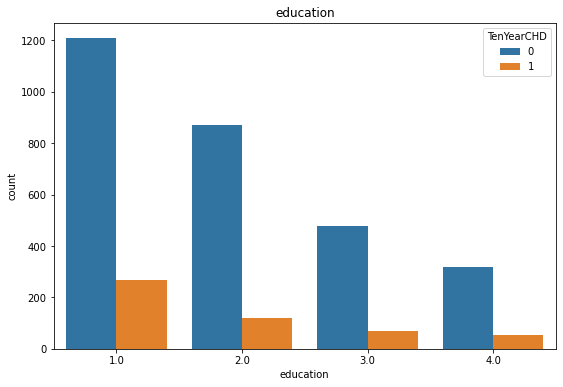

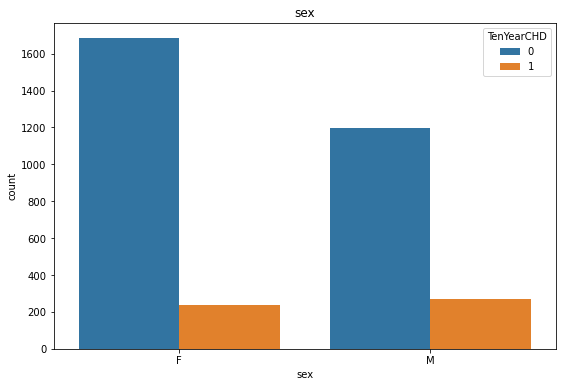

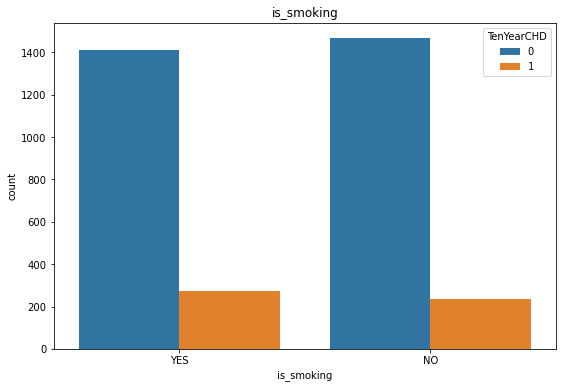

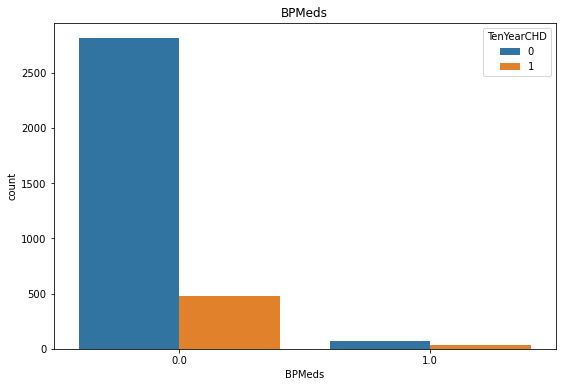

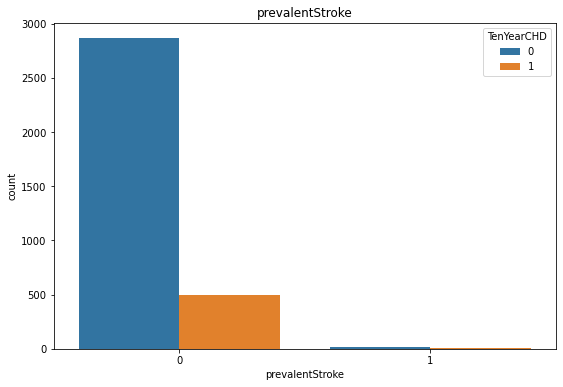

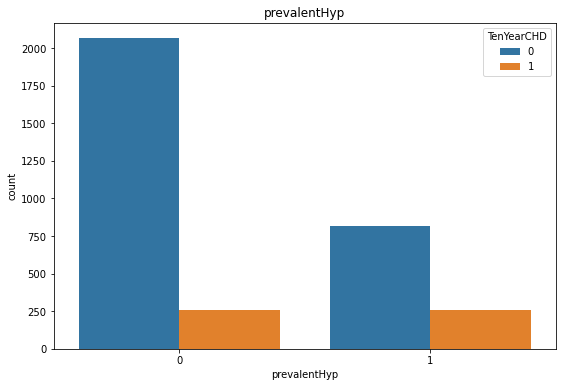

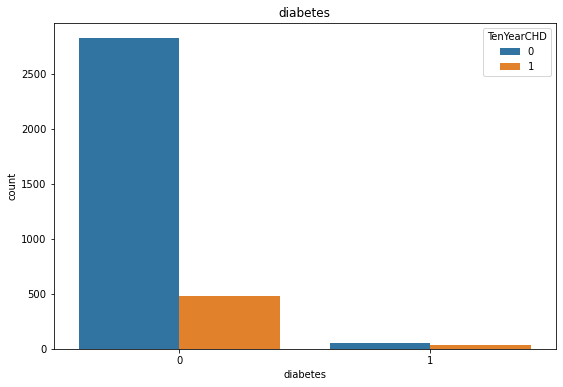

In [64]:

for col in cat_var:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca() #Get Current Axis GCA and GCF get current figure
    feature = df[col]
    sns.countplot(feature,hue=df['TenYearCHD'])
    #feature.distplot(bins=50, ax = ax)
    #ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    #ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

### from the above count plots we can observe that very few patients are highly educated and they have less number of CHD patients and it gets gradually increasing with decreasing education level, 

### 56.72% are female and 43.27% are male in the dataset and there are slightly higher males with CHD

### 49.7% are smokers and 50.23% non smokers are almost equal and smokers category is having high number of CHD patients

### it can also be observed that patients on BPMeds are less likely to have CHD ascompared to those who are not on medication
### patients with prevalent stroke are less likely to have CHD because may be they are on proper medication like vasso dialators and on blood thinners and the same can be observed from the EDA

### 31% is having Hyper tension and among those hypertensive 30% more prone to develop CHD as compared to those with no hypertension

### 2% patients having diabetes and among those there is high chance of having CHD 


<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

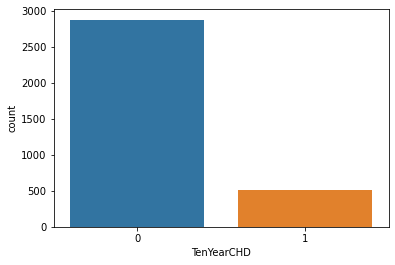

In [65]:
sns.countplot(df.TenYearCHD)

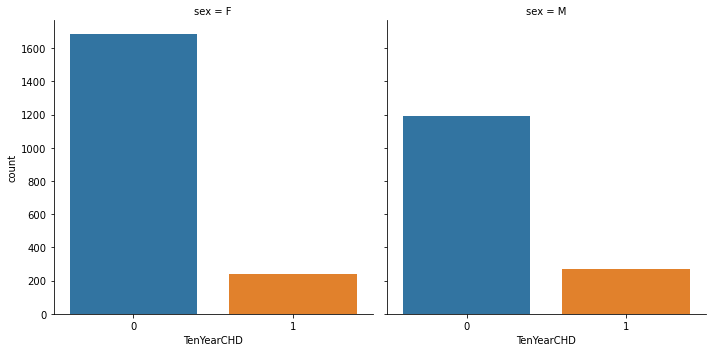

In [66]:
sns.catplot(x='TenYearCHD',col='sex',kind='count',data=df)

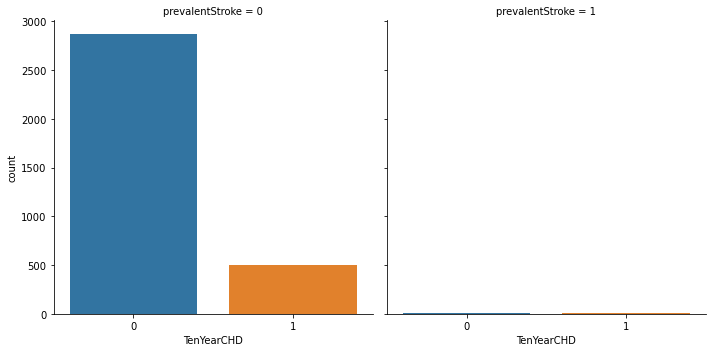

In [67]:
sns.catplot(x='TenYearCHD',col='prevalentStroke',kind='count',data=df)

In [68]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

## Create the dummy variables


**A dataset may contain various type of values, sometimes it consists of categorical values. So, in-order to use those categorical value for programming efficiently we create dummy variables.**



### one hot encoding allows the representation of categorical data to be more expressive. Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. This is required for both input and output variables that are categorical.
### we have to perform one hot encoding to convert the categorical data into numeric data for the features like 'sex' and 'is_smoking'

In [69]:
#Assign all catagoriacla features that needs to be converted to a numeric variable
categorical_features=list(df.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['sex', 'is_smoking'], dtype='object')

In [70]:
#creat a copy
df_copy = df

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    df_copy = one_hot_encoding(df_copy, col)
df_copy.head()   # now all the features are numeric

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,sex_M,is_smoking_YES
0,0,64,2.0,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1,0,1
1,1,36,4.0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0,1,0
2,2,46,1.0,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0,0,1
3,3,50,1.0,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1,1,1
4,4,64,1.0,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0,0,1


## Checking for the outliers in the data

In [71]:
df_copy=df_copy.drop(labels='id',axis=1)

In [72]:
numeric_variables

['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

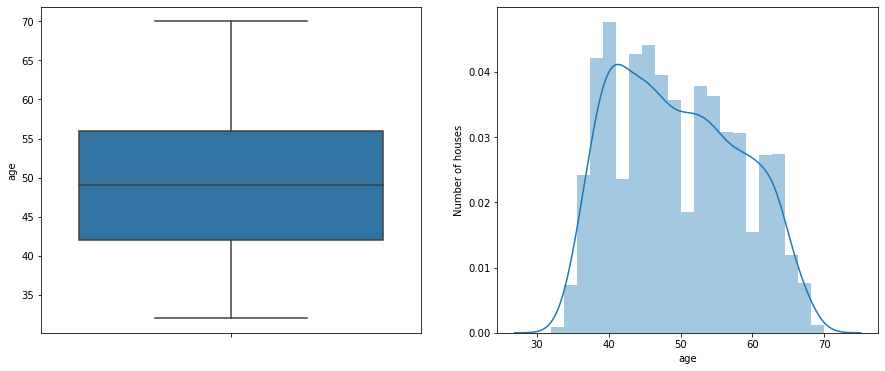

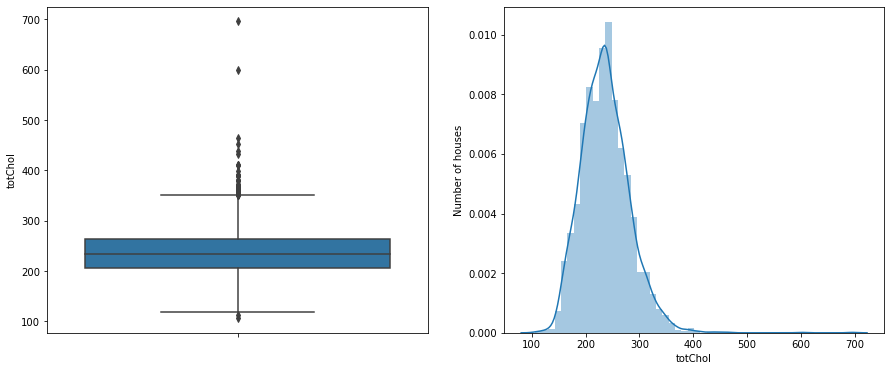

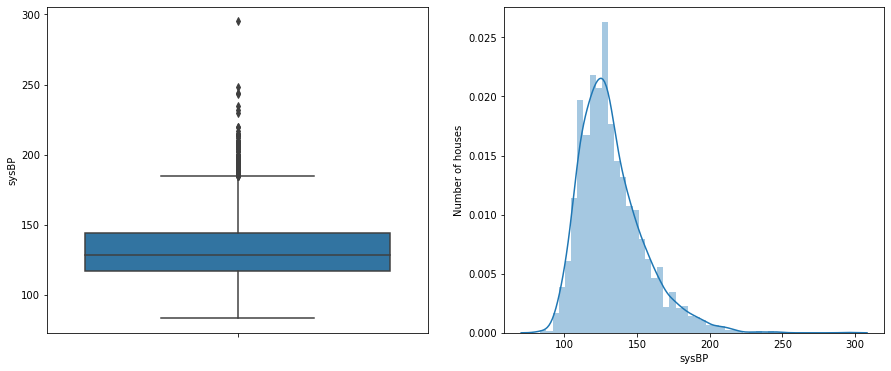

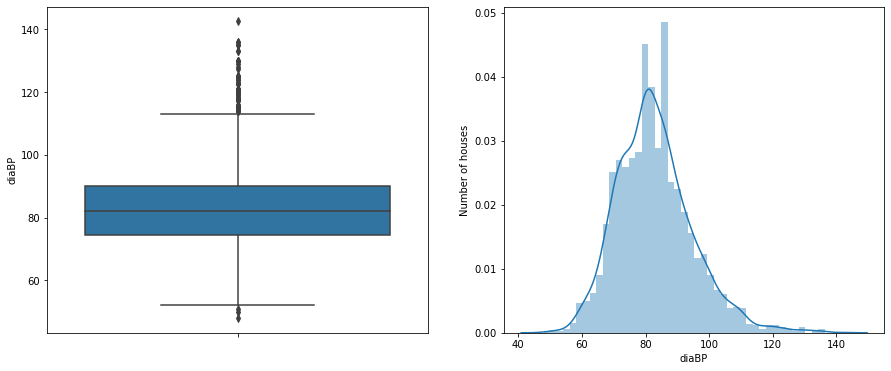

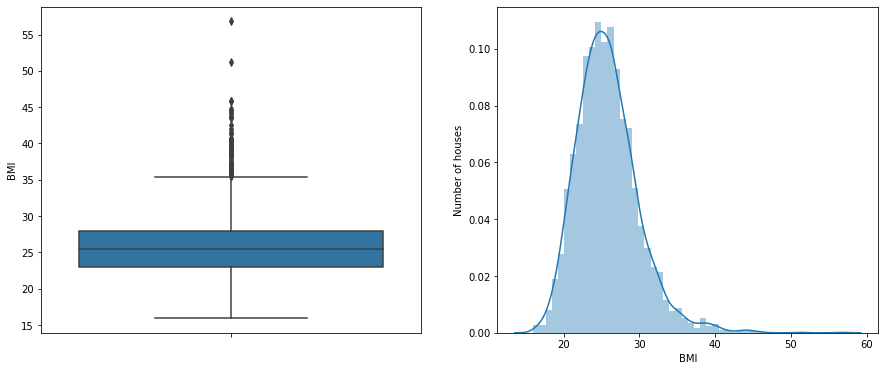

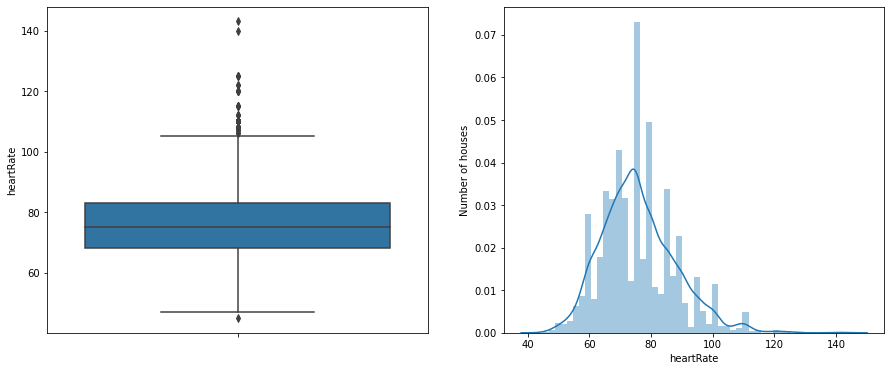

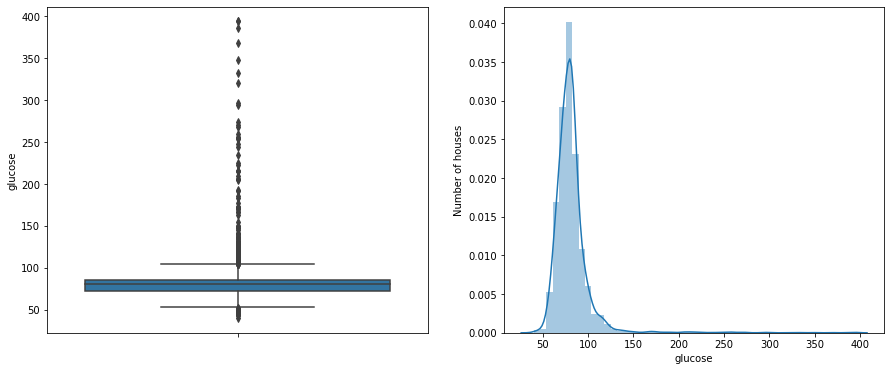

In [73]:
for var in numeric_variables:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df_copy[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df_copy[var].dropna())
    fig.set_ylabel('Number of houses')
    fig.set_xlabel(var)

    plt.show()

In [74]:
#Capping the outlier rows with Percentiles

for var in numeric_variables:
    upper_lim = df_copy[var].quantile(.95)
    lower_lim = df_copy[var].quantile(.05)
    df_copy.loc[(df_copy[var] > upper_lim),var] = upper_lim
    df_copy.loc[(df_copy[var] < lower_lim),var] = lower_lim

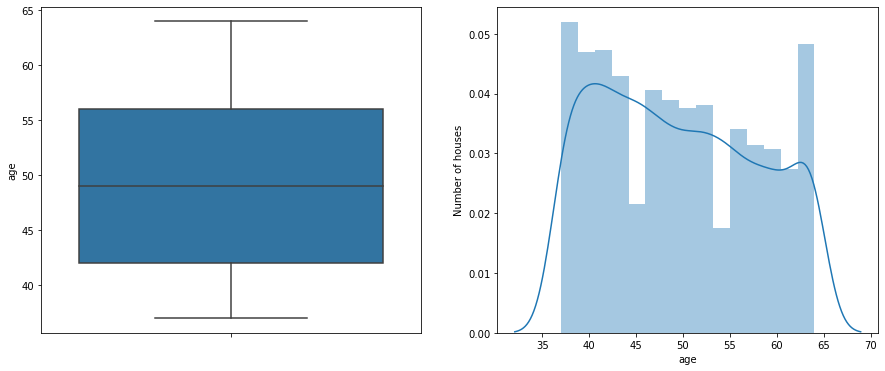

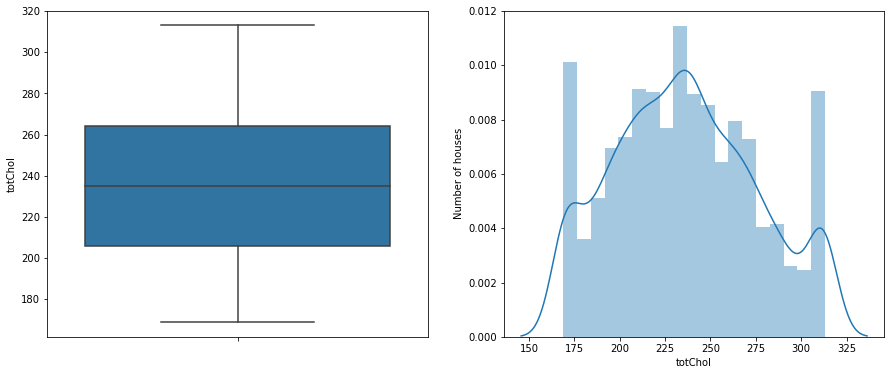

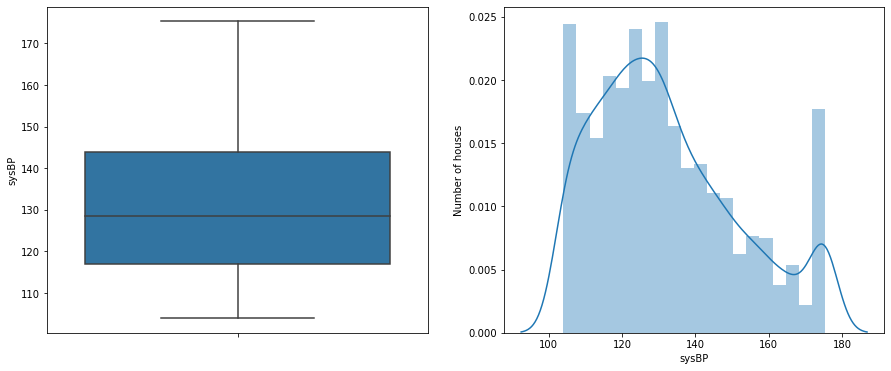

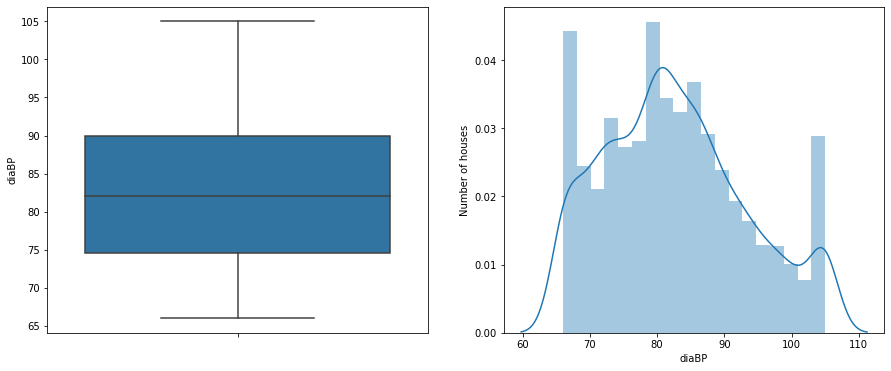

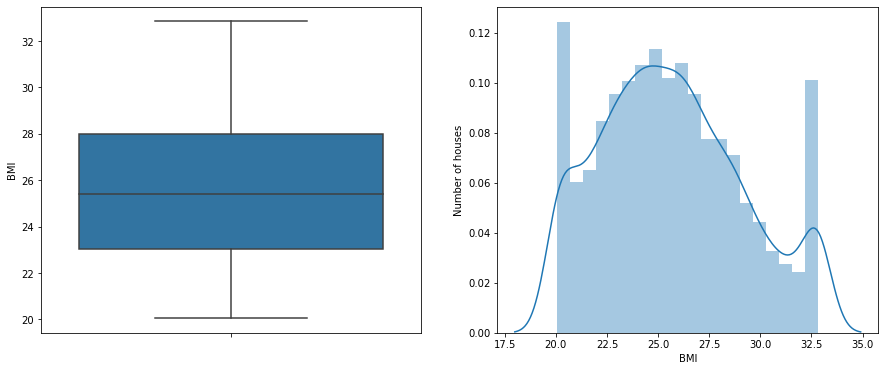

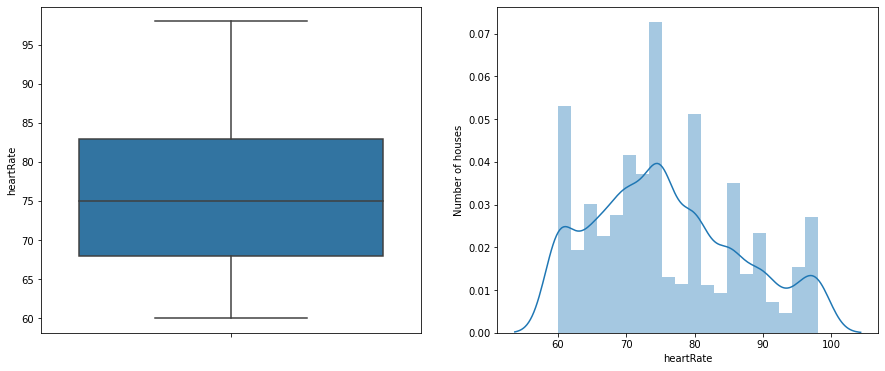

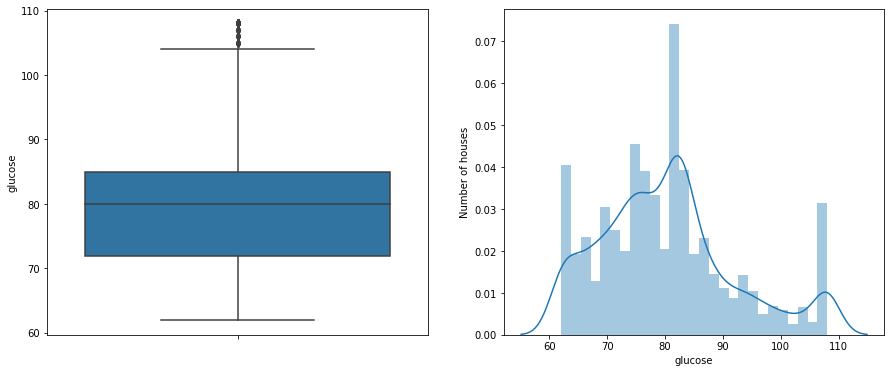

In [75]:
#again checking for the outliers
for var in numeric_variables:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df_copy[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df_copy[var].dropna())
    fig.set_ylabel('Number of houses')
    fig.set_xlabel(var)

    plt.show()

In [76]:
df_copy.shape

(3390, 16)

<AxesSubplot:>

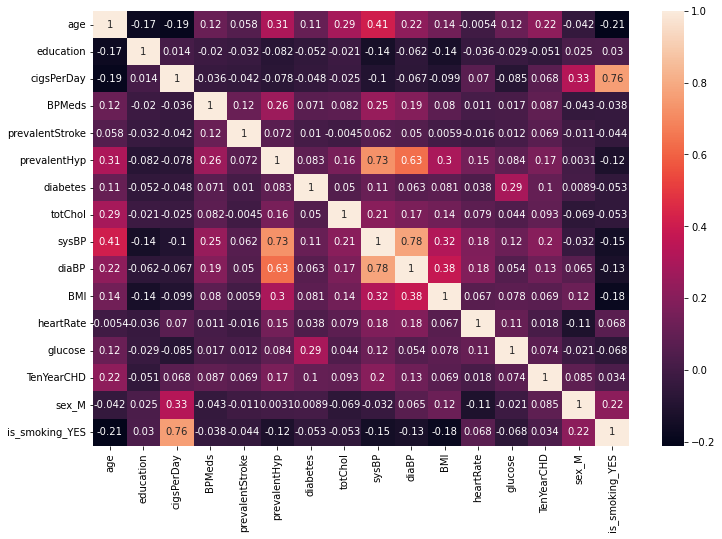

In [77]:
plt.figure(figsize=(12,8))
sns.heatmap(df_copy.corr(),annot=True)

### from the correlation heatmap we can observe the follwing 

### cigsPerday feature is highly correlated with is_Smoking
we can keep cigsperday as it reveals more information obout the smoking pattern and its effect

### PrevalentHyp showing correlation with sysBp and diaBP
there is high multi collinearity exist between these three features. we will use PrevalentHyp because we want to know weather the patient is hypertensive or not rather knowing thier exact BP and these three are slightly correlated with BPMeds also.

### diabetes is colinear with glucose
we will keep diabetes and drop glucose as the diabetic patient will inherently has higher glucose levels



In [78]:
df_copy.columns

Index(['age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD', 'sex_M', 'is_smoking_YES'],
      dtype='object')

In [79]:
Final_var=['age','cigsPerDay','prevalentHyp','diabetes','BMI','education','prevalentStroke','totChol','heartRate','sex_M','TenYearCHD','BPMeds','sysBP','diaBP','glucose']

In [80]:
Final_var1=['age','cigsPerDay','prevalentHyp','diabetes','BMI','prevalentStroke','totChol','heartRate','sex_M','TenYearCHD']

# The Target variable

we can observe from the follwing that the target variable is having imbalanced classes , it constitutes of around 85% of majority class 0 and 15% of minority class 1

if we try to train our model with this data then it will be biased towards the majority class and wil not predict the accurate results

this imbalanced data can be handleled in following Resampling Techniques

1- undersampling the majority class
removing the samples from the mojority class is called undersampling, as we removes samples from the majority class that tends to losing of information

tomeklinks is the undersampling technique

2- oversampling the minority class
adding more samples from the minority class is called oversampling, this works fine will relatively small datasets and it is prone to overfit the model and poor generalization with the test set and as we add more samples that leads to data redundancy 

SMOTE is the oversampling technique that generates synthetic data for minority class, it works by randomly picking a point from minority class and computing the K neighbor for that point

The synthetic points are added between the choosen point and its neighbors

SMOTE works in 4 steps

1. choose the minority class as input vector

2. find its K nearest neighbors

3. choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its choosen nieghbor

4. repeat the step untill the data gets balanced


3- Combination of under and over sampling
4- Ensemble Approach
5- Batch Approch

In [81]:
df_copy1=df_copy[Final_var]

In [82]:
df_copy1

,age,cigsPerDay,prevalentHyp,diabetes,BMI,education,prevalentStroke,totChol,heartRate,sex_M,TenYearCHD,BPMeds,sysBP,diaBP,glucose
0,64,3.0,0,0,25.794964,2.0,0,221.0,90.0,0,1,0.0,148.0,85.0,80.0
1,37,0.0,1,0,29.770000,4.0,0,212.0,72.0,1,0,0.0,168.0,98.0,75.0
2,46,10.0,0,0,20.350000,1.0,0,250.0,88.0,0,0,0.0,116.0,71.0,94.0
3,50,20.0,1,0,28.260000,1.0,0,233.0,68.0,1,1,0.0,158.0,88.0,94.0
4,64,30.0,0,0,26.420000,1.0,0,241.0,70.0,0,0,0.0,136.5,85.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,0.0,0,0,29.280000,1.0,0,261.0,70.0,0,0,0.0,123.5,79.0,103.0
3386,46,0.0,0,0,21.960000,1.0,0,199.0,80.0,0,0,0.0,104.0,66.0,84.0
3387,44,3.0,1,0,28.920000,3.0,0,313.0,73.0,1,1,0.0,164.0,105.0,72.0
3388,60,0.0,1,0,23.010000,1.0,0,191.0,80.0,1,0,0.0,167.0,105.0,85.0


In [83]:
df_copy1['TenYearCHD'].value_counts(normalize=True) # imbalanced target variable and we need to resample it 

0    0.849263
1    0.150737
Name: TenYearCHD, dtype: float64

In [84]:
X = df_copy1.drop(["TenYearCHD"],axis=1) #independent variables

y = df_copy1["TenYearCHD"] #Dependent Variable

<AxesSubplot:title={'center':'TenYearCHD'}>

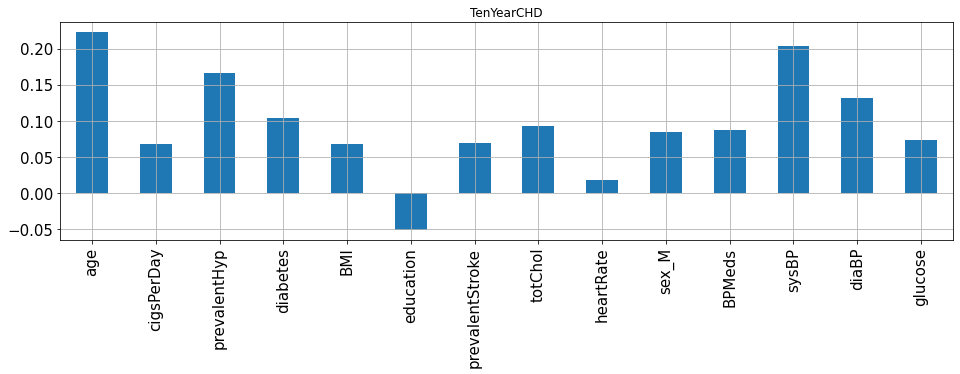

In [85]:
#Correlation with Response Variable class

X.corrwith(y).plot.bar(
        figsize = (16, 4), title = "TenYearCHD", fontsize = 15,
        rot = 90, grid = True)

### all the features having possitive correlation with the target varioable except the education with negative correaltion

In [86]:
!pip install imblearn

In [87]:
# for the imbalanced target variable we to resample it using SMOTE technique
from collections import Counter
from imblearn.over_sampling import SMOTE 
SMOTE = SMOTE()

print('Original dataset shape %s' % Counter(y))

X_res, y_res = SMOTE.fit_resample(X, y)

print('After undersample dataset shape %s' % Counter(y_res))


Original dataset shape Counter({0: 2879, 1: 511})
After undersample dataset shape Counter({1: 2879, 0: 2879})


In [88]:
X_res.head()

,age,cigsPerDay,prevalentHyp,diabetes,BMI,education,prevalentStroke,totChol,heartRate,sex_M,BPMeds,sysBP,diaBP,glucose
0,64,3.0,0,0,25.794964,2.0,0,221.0,90.0,0,0.0,148.0,85.0,80.0
1,37,0.0,1,0,29.770000,4.0,0,212.0,72.0,1,0.0,168.0,98.0,75.0
2,46,10.0,0,0,20.350000,1.0,0,250.0,88.0,0,0.0,116.0,71.0,94.0
3,50,20.0,1,0,28.260000,1.0,0,233.0,68.0,1,0.0,158.0,88.0,94.0
4,64,30.0,0,0,26.420000,1.0,0,241.0,70.0,0,0.0,136.5,85.0,77.0


In [89]:
y_res.value_counts() # now we have the balanced data

1    2879
0    2879
Name: TenYearCHD, dtype: int64

## Splitting the data into train and test



In [90]:
X_train, X_test, Y_train, Y_test = train_test_split(X_res,y_res,test_size = 0.25,  random_state=25)

In [91]:
# Check the shape of train dataset
print('the Size of Train dataset')
print(X_train.shape,Y_train.shape)
print('the Size of Test dataset')

# Check the shape of test dataset
print(X_test.shape, Y_test.shape)

the Size of Train dataset
(4318, 14) (4318,)
the Size of Test dataset
(1440, 14) (1440,)


In [92]:
X_train.isnull().sum().sum() # No NaN values

0

## Feature Scaling 

features scaling is always preferred after splitting the data because before splitting if we perform scaling than it would result in data leakage

scale the numeric variables only

In [93]:
numeric_variables1=['age','cigsPerDay','glucose','BMI','totChol','heartRate','sysBP','diaBP','education']

In [94]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[numeric_variables1] = scaler.fit_transform(X_train[numeric_variables1])
X_train.head()


,age,cigsPerDay,prevalentHyp,diabetes,BMI,education,prevalentStroke,totChol,heartRate,sex_M,BPMeds,sysBP,diaBP,glucose
4567,0.629630,0.462336,1,0,0.616051,0.000000,0,0.450919,0.801368,1,0.774017,1.000000,0.940460,0.637125
1636,0.962963,0.000000,1,0,0.978873,0.666667,0,0.500000,0.131579,0,0.000000,0.687478,0.589744,0.282609
2452,0.074074,0.000000,0,0,0.528951,0.000000,0,0.000000,0.000000,1,0.000000,0.280603,0.615385,0.108696
137,0.074074,0.716667,1,0,0.444444,0.000000,0,0.847222,0.184211,1,0.000000,1.000000,0.871795,0.630435
1247,0.555556,0.150000,0,0,0.194053,0.666667,0,0.555556,0.315789,0,0.000000,0.112241,0.230769,0.195652


In [95]:
scaler = MinMaxScaler()
X_test[numeric_variables1] = scaler.fit_transform(X_test[numeric_variables1])
X_test.head()

,age,cigsPerDay,prevalentHyp,diabetes,BMI,education,prevalentStroke,totChol,heartRate,sex_M,BPMeds,sysBP,diaBP,glucose
2569,0.185185,0.000000,0,0,0.202660,0.000000,0,0.527778,0.657895,0,0.0,0.189407,0.615385,0.739130
4334,0.666667,0.428571,0,0,0.399403,0.000000,0,0.093019,0.000000,1,0.0,0.581985,0.616772,0.301928
4198,0.740741,0.067968,1,0,0.559682,0.000000,0,0.498943,0.389956,0,0.0,0.642414,0.456880,0.683804
5403,0.370370,0.393360,0,0,0.347547,0.000000,0,1.000000,0.656043,0,0.0,0.281986,0.154568,0.315370
1694,0.888889,0.000000,0,0,0.153365,0.333333,0,0.708333,0.342105,0,0.0,0.252543,0.038462,0.239130


## Cross Validation

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [97]:
conda install -c anaconda py-xgboost

Solving environment: ...working... done

## Package Plan ##

  environment location: c:\Users\d\anaconda3

  added / updated specs:
    - py-xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2021.10.8          |   py39haa95532_0         155 KB  anaconda
    conda-4.13.0               |   py39haa95532_0        1016 KB  anaconda
    py-xgboost-1.5.0           |   py39haa95532_1         166 KB  anaconda
    ------------------------------------------------------------
                                           Total:         1.3 MB

The following NEW packages will be INSTALLED:

  _py-xgboost-mutex  anaconda/win-64::_py-xgboost-mutex-2.0-cpu_0
  libxgboost         anaconda/win-64::libxgboost-1.5.0-hd77b12b_1
  py-xgboost         anaconda/win-64::py-xgboost-1.5.0-py39haa95532_1

The following packages will be UPDATED:

  conda              pkgs/main::conda-4.12.0-py39haa95532_



==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 4.13.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [98]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
import xgboost as xgb
# function initializing baseline machine learning models
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR L2' , LogisticRegression(penalty='l2')))
    basedModels.append(('KNN2'  , KNeighborsClassifier(2)))
    basedModels.append(('KNN4'  , KNeighborsClassifier(4)))
    basedModels.append(('KNN6'  , KNeighborsClassifier(6)))
    basedModels.append(('KNN8'  , KNeighborsClassifier(8)))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM Linear'  , SVC(kernel='linear',gamma='auto',probability=True)))
    basedModels.append(('SVM RBF'  , SVC(kernel='rbf',gamma='auto',probability=True)))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier(n_estimators=100,max_features='sqrt')))
    basedModels.append(('RF_Ent100'   , RandomForestClassifier(criterion='entropy',n_estimators=100)))
    basedModels.append(('RF_Gini100'   , RandomForestClassifier(criterion='gini',n_estimators=100)))
    basedModels.append(('ET100'   , ExtraTreesClassifier(n_estimators= 100)))
    basedModels.append(('ET500'   , ExtraTreesClassifier(n_estimators= 500)))
    basedModels.append(('MLP', MLPClassifier()))
    basedModels.append(('SGD3000', linear_model.SGDClassifier(max_iter=1000, tol=1e-4)))
    basedModels.append(('XGB_2000', xgb.XGBClassifier(n_estimators= 2000,eval_metric='error' )))
    basedModels.append(('XGB_500', xgb.XGBClassifier(n_estimators= 500,eval_metric='error')))
    basedModels.append(('XGB_100', xgb.XGBClassifier(n_estimators= 100,eval_metric='error')))
    basedModels.append(('XGB_1000', xgb.XGBClassifier(n_estimators= 1000,eval_metric='error')))
    basedModels.append(('ET1000'   , ExtraTreesClassifier(n_estimators= 1000)))
    
    return basedModels

# function for performing 10-fold cross validation of all the baseline models
def BasedLine2(X_train, Y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'
    seed = 7
    results = []
    names = []
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10)
        cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
         
        
    return results,msg

In [99]:
models = GetBasedModel()
names,results = BasedLine2(X_train, Y_train,models)


LR L2: 0.669516 (0.018291)
KNN2: 0.814267 (0.021737)
KNN4: 0.778363 (0.025112)
KNN6: 0.754505 (0.029394)
KNN8: 0.745473 (0.020738)
CART: 0.809868 (0.016358)
NB: 0.617180 (0.016622)
SVM Linear: 0.669978 (0.016144)
SVM RBF: 0.673221 (0.016333)
AB: 0.803847 (0.012480)
GBM: 0.809163 (0.014426)
RF_Ent100: 0.898101 (0.013659)
RF_Gini100: 0.894396 (0.017121)
ET100: 0.905283 (0.019097)
ET500: 0.904814 (0.018321)
MLP: 0.722775 (0.026199)
SGD3000: 0.658175 (0.018326)
XGB_2000: 0.876556 (0.014267)
XGB_500: 0.875632 (0.013022)
XGB_100: 0.877486 (0.014242)
XGB_1000: 0.874936 (0.014069)
ET1000: 0.905746 (0.017559)


## Model Building

### the best algorithm from all is ET_1000 having 90.50 % accuracy is the cross validation score

### next we will build the model or model building part

### the algorithm which performs well we will take that algo and build the model for that algorithm



### 1. Logistic Regression with L2 regularization

In [100]:
log_reg=LogisticRegression(fit_intercept=True, max_iter=10000,penalty='l2')
log_reg.fit(X_train,Y_train)
X_test_pred_lr=np.around(log_reg.predict(X_test))

### 2. K Nearest Neighbors (n=2)

In [101]:
knn = KNeighborsClassifier(2)
knn.fit(X_train,Y_train)
X_test_pred_knn = knn.predict(X_test)

### 3. Decision Tree CART 

In [102]:
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
X_test_pred_dt = dt.predict(X_test)

### 4. SVM (kernel=rbf)

In [103]:
svc = SVC(kernel='rbf',gamma='auto',probability=True)
svc.fit(X_train,Y_train)
X_test_pred_svc = svc.predict(X_test)

### 5. AdaBoost Classifier

In [104]:
ada = AdaBoostClassifier()
ada.fit(X_train,Y_train)
X_pred_pred_ada = ada.predict(X_test)

### 6. Gradient Boosting

In [105]:
gbm = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbm.fit(X_train,Y_train)
X_test_pred_gbm = gbm.predict(X_test)

### 7. RandomForestClassifier

In [106]:
rf=RandomForestClassifier(criterion='entropy',n_estimators=100)
rf.fit(X_train,Y_train)
X_test_pred_rf = rf.predict(X_test)

### 8. Extra Tree Classifier (n_estimators=500)

In [107]:
et_500 = ExtraTreesClassifier(n_estimators= 500)
et_500.fit(X_train,Y_train)
X_test_pred_et_500 = et_500.predict(X_test)

### 9. XGBoost (n_estimators=500)

In [108]:
import xgboost as xgb
xgb = xgb.XGBClassifier(n_estimators= 500,eval_metric ='logloss')
xgb.fit(X_train,Y_train)
X_test_pred_xgb = xgb.predict(X_test)

### 10. Extra Tree Classifier (n_estimators=1000)

In [109]:
et_1000 = ExtraTreesClassifier(n_estimators= 1000)
et_1000.fit(X_train,Y_train)
X_test_pred_et_1000 = et_1000.predict(X_test)

# Model Evaluation  using test data

## The performance metrics are Accuracy Precision Recall  F1Score Roc Score Log loss

,Model,Accuracy,Precision,Recall,F1 Score,ROC,Log_Loss
0,ExtraTreesClassifier1000,0.920833,0.898785,0.944681,0.921162,0.92132,2.734361


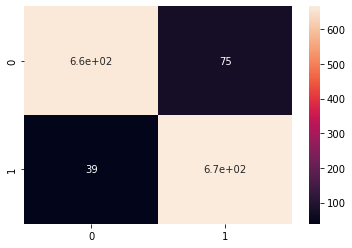

In [110]:
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
CM=confusion_matrix(Y_test,X_test_pred_et_1000)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

loss_log = log_loss(Y_test, X_test_pred_et_1000)
acc= accuracy_score(Y_test, X_test_pred_et_1000)
roc=roc_auc_score(Y_test, X_test_pred_et_1000)
prec = precision_score(Y_test, X_test_pred_et_1000)
rec = recall_score(Y_test, X_test_pred_et_1000)
f1 = f1_score(Y_test, X_test_pred_et_1000)

#mathew = matthews_corrcoef(Y_test, X_test_pred_et_1000)
model_results =pd.DataFrame([['ExtraTreesClassifier1000',acc, prec,rec, f1,roc, loss_log]],
               columns = ['Model', 'Accuracy','Precision', 'Recall', 'F1 Score','ROC','Log_Loss'])
model_results

In [111]:
data = {        'Logistic Regression': X_test_pred_lr,
                'KNN': X_test_pred_knn,
                'Decision Tree':X_test_pred_dt,
                'SVC': X_test_pred_svc,
                'Adaboost': X_pred_pred_ada,
                'GBM': X_test_pred_gbm,
                'Random Forest':X_test_pred_rf,
                'EXtra tree classifier500': X_test_pred_et_500,
                'XGB': X_test_pred_xgb, 
                
                 }

models = pd.DataFrame(data) 
 
for column in models:
    CM=confusion_matrix(Y_test,models[column])
    
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    
    loss_log = log_loss(Y_test, models[column])
    acc= accuracy_score(Y_test, models[column])
    roc=roc_auc_score(Y_test, models[column])
    prec = precision_score(Y_test, models[column])
    rec = recall_score(Y_test, models[column])
    f1 = f1_score(Y_test, models[column])
    
    
    results =pd.DataFrame([[column, prec,rec, f1,acc,roc, loss_log]],
               columns = ['Model','Precision', 'Recall', 'F1 Score', 'Accuracy','ROC','Log_Loss'])
    model_results = model_results.append(results, ignore_index = True)

model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC,Log_Loss
0,ExtraTreesClassifier1000,0.920833,0.898785,0.944681,0.921162,0.921320,2.734361
1,Logistic Regression,0.678472,0.671875,0.670922,0.671398,0.678318,11.105304
2,KNN,0.836806,0.824586,0.846809,0.835549,0.837010,5.636607
3,Decision Tree,0.814583,0.788918,0.848227,0.817498,0.815270,6.404154
4,SVC,0.681944,0.658131,0.729078,0.691790,0.682906,10.985398
5,Adaboost,0.809722,0.816446,0.788652,0.802309,0.809292,6.572031
6,GBM,0.809722,0.804809,0.807092,0.805949,0.809669,6.572038
7,Random Forest,0.900694,0.896893,0.900709,0.898797,0.900695,3.429933
8,EXtra tree classifier500,0.925694,0.905149,0.947518,0.925849,0.926140,2.566462
9,XGB,0.884722,0.874826,0.892199,0.883427,0.884875,3.981603


## Roc Auc Curve

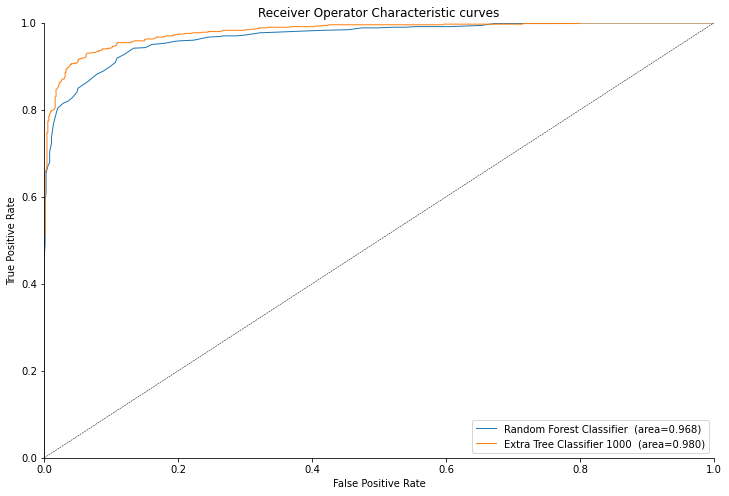

In [112]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))


roc_auc_plot(Y_test,rf.predict_proba(X_test),label='Random Forest Classifier ',l='-')
roc_auc_plot(Y_test,et_1000.predict_proba(X_test),label='Extra Tree Classifier 1000 ',l='-')


ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()

## Precesion Recall Curve

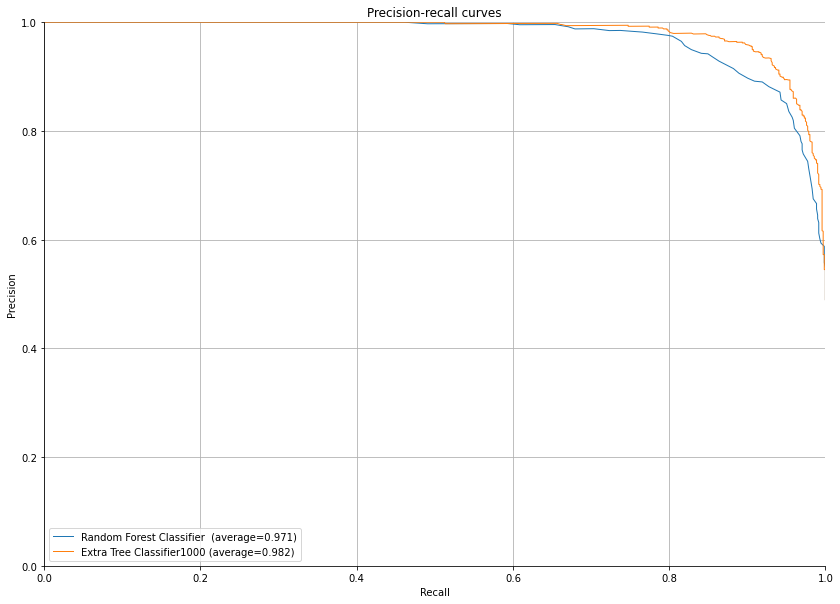

In [113]:
def precision_recall_plot(Y_test, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import precision_recall_curve, average_precision_score
    precision, recall, _ = precision_recall_curve(Y_test,
                                                  y_proba[:,1])
    average_precision = average_precision_score(Y_test, y_proba[:,1],
                                                     average="micro")
    ax.plot(recall, precision, label='%s (average=%.3f)'%(label,average_precision),
            linestyle=l, linewidth=lw)

f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(Y_test,rf.predict_proba(X_test),label='Random Forest Classifier ',l='-')
precision_recall_plot(Y_test,et_1000.predict_proba(X_test),label='Extra Tree Classifier1000',l='-')

ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-recall curves')
sns.despine()

## Feature Selection

In [114]:
num_features=14

def cor_selector(X_res, y_res,num_features): # the original resampled data
    cor_list = []
    feature_name = X_res.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X_res.columns.tolist():
        cor = np.corrcoef(X_res[i], y_res)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X_res.iloc[:,np.argsort(np.abs(cor_list))[-num_features:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X_res, y_res,num_features)
print(str(len(cor_feature)), 'selected features')

14 selected features


In [115]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X_res)
chi_selector = SelectKBest(chi2, k=num_features)
chi_selector.fit(X_norm, y_res)
chi_support = chi_selector.get_support()
chi_feature = X_res.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

14 selected features


In [116]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_features, step=10, verbose=5)
rfe_selector.fit(X_norm, y_res)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

14 selected features


In [117]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2", solver='lbfgs'), max_features=num_features)
embeded_lr_selector.fit(X_norm, y_res)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

3 selected features


In [118]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100, criterion='gini'), max_features=num_features)
embeded_rf_selector.fit(X_res, y_res)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X_res.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

9 selected features


In [119]:
!pip install lightgbm

In [120]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, max_features=num_features)
embeded_lgb_selector.fit(X_res, y_res)

embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X_res.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

8 selected features


In [121]:
# put all selection together
feature_name = X_res.columns
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support, 'LightGBM':embeded_lgb_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(num_features)

,Feature,Pearson,Chi-2,RFE,Logistics,Random Forest,LightGBM,Total
1,sysBP,True,True,True,True,True,True,6
2,age,True,True,True,True,True,True,6
3,totChol,True,True,True,False,True,True,5
4,heartRate,True,True,True,False,True,True,5
5,glucose,True,True,True,False,True,True,5
6,education,True,True,True,False,True,True,5
7,diaBP,True,True,True,False,True,True,5
8,cigsPerDay,True,True,True,True,True,False,5
9,BMI,True,True,True,False,True,True,5
10,sex_M,True,True,True,False,False,False,3


In [122]:
# segregating dataset into features i.e., X and target variables i.e., y
X1 = X_res.drop(['BPMeds','diabetes','prevalentHyp','prevalentStroke','sex_M','education'],axis=1)
y1=pd.DataFrame(data=y_res,columns=['TenYearCHD'])

In [123]:
selected_features=['age', 'cigsPerDay',  'BMI', 'totChol', 'heartRate', 'sysBP','diaBP', 'glucose']

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2,shuffle=True, random_state=5)


In [125]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[selected_features] = scaler.fit_transform(X_train[selected_features])
X_train.head()

,age,cigsPerDay,BMI,totChol,heartRate,sysBP,diaBP,glucose
3142,0.370370,0.000000,0.265258,0.368056,0.473684,0.820765,0.679487,0.391304
3727,0.888889,0.000000,0.432963,0.705100,0.801727,1.000000,0.936778,0.515483
4462,0.333333,0.218426,0.486603,0.444078,0.386428,0.127752,0.102564,0.075504
267,0.000000,0.500000,0.628326,0.979167,0.473684,0.308664,0.538462,0.347826
3498,0.222222,0.037930,0.099712,0.241810,0.800183,0.243931,0.499382,0.296403


In [126]:
X_test[selected_features] = scaler.transform(X_test[selected_features])
X_test.head()

,age,cigsPerDay,BMI,totChol,heartRate,sysBP,diaBP,glucose
2658,0.481481,0.166667,0.325509,0.354167,0.394737,0.252543,0.358974,0.217391
1367,1.000000,0.000000,0.642410,0.236111,0.394737,1.000000,0.435897,1.000000
2890,0.148148,0.333333,0.388889,0.159722,0.605263,0.252543,0.410256,0.086957
4611,0.407407,0.415783,0.712596,0.815487,0.481034,0.608274,0.790180,0.697292
5384,0.407407,0.097628,0.157661,0.983729,0.021802,0.073966,0.035350,0.291614


In [127]:
import xgboost as xgb
models = GetBasedModel()
names,results = BasedLine2(X_train, y_train,models)

LR L2: 0.669773 (0.020452)
KNN2: 0.866694 (0.013197)
KNN4: 0.831523 (0.015943)
KNN6: 0.804608 (0.020050)
KNN8: 0.787888 (0.026835)
CART: 0.779643 (0.014086)
NB: 0.635255 (0.022884)
SVM Linear: 0.665431 (0.019498)
SVM RBF: 0.668904 (0.012187)
AB: 0.731220 (0.013455)
GBM: 0.761609 (0.010954)
RF_Ent100: 0.876037 (0.012423)
RF_Gini100: 0.874734 (0.011841)
ET100: 0.901651 (0.009893)
ET500: 0.905126 (0.011726)
MLP: 0.699307 (0.018261)
SGD3000: 0.646326 (0.029712)
XGB_2000: 0.887114 (0.014156)
XGB_500: 0.887109 (0.011513)
XGB_100: 0.885807 (0.009300)
XGB_1000: 0.886895 (0.013254)
ET1000: 0.906432 (0.009027)


### Soft voting

In [128]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [129]:
import xgboost as xgb
clf1=ExtraTreesClassifier(n_estimators= 500)
clf2=xgb.XGBClassifier(n_estimators= 1000,eval_metric='logloss' )
clf3=RandomForestClassifier(criterion='gini',n_estimators=100)
clf4=KNeighborsClassifier()


soft_voting_clf = VotingClassifier(estimators=[('Extra_Tree_clf', clf1), ('xgb', clf2), ('RFe', clf3),('knn',clf4)], 
                         voting='soft', weights=[4,3,2,1])
soft_voting_clf.fit(X_train,y_train)
y_pred_svclf =soft_voting_clf.predict(X_test)

## Model Evaluation

,Model,Accuracy,Precision,Recall,F1 Score,ROC,Log_Loss
0,Soft Voting,0.927083,0.908007,0.946714,0.926957,0.927517,2.51849


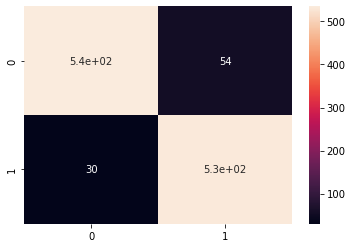

In [130]:
CM=confusion_matrix(y_test,y_pred_svclf)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred_svclf)
acc= accuracy_score(y_test, y_pred_svclf)
roc=roc_auc_score(y_test, y_pred_svclf)
prec = precision_score(y_test, y_pred_svclf)
rec = recall_score(y_test, y_pred_svclf)
f1 = f1_score(y_test, y_pred_svclf)


model_results =pd.DataFrame([['Soft Voting',acc, prec,rec, f1,roc, loss_log]],
               columns = ['Model', 'Accuracy','Precision', 'Recall', 'F1 Score','ROC','Log_Loss'])

model_results

### we have got 93.2% accuracy with only 8 features

### again we build models using different algo and compare the results with the soft voting classfier

In [131]:
log_reg=LogisticRegression(fit_intercept=True, max_iter=10000,penalty='l2')
log_reg.fit(X_train,y_train)
X_test_pred_lr=np.around(log_reg.predict(X_test))

In [132]:
knn = KNeighborsClassifier(2)
knn.fit(X_train,y_train)
X_test_pred_knn = knn.predict(X_test)

In [133]:
svc = SVC(kernel='rbf',gamma='auto',probability=True)
svc.fit(X_train,y_train)
X_test_pred_svc = svc.predict(X_test)

In [134]:
rf=RandomForestClassifier(criterion='gini',n_estimators=100)
rf.fit(X_train,y_train)
X_test_pred_rf = rf.predict(X_test)

In [135]:
et_500 = ExtraTreesClassifier(n_estimators= 500)
et_500.fit(X_train,y_train)
X_test_pred_et_500 = et_500.predict(X_test)

In [136]:
import xgboost as xgb
xgb = xgb.XGBClassifier(n_estimators= 500,eval_metric ='logloss')
xgb.fit(X_train,y_train)
X_test_pred_xgb = xgb.predict(X_test)

In [137]:
sgd = linear_model.SGDClassifier(max_iter=1000, tol=1e-4)
sgd.fit(X_train,y_train)
X_pred_sgd = sgd.predict(X_test)

In [138]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
X_pred_pred_ada = ada.predict(X_test)

In [139]:
gbm = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbm.fit(X_train,y_train)
X_test_pred_gbm = gbm.predict(X_test)

In [140]:
data = {
             'Logistic Regression': X_test_pred_lr, 
                'KNN2': X_test_pred_knn, 
                'SVC': X_test_pred_svc, 
                'Random Forest':X_test_pred_rf,
                'EXtra tree classifier': X_test_pred_et_500,
                'XGB': X_test_pred_xgb, 
                'SGD2': X_pred_sgd,
                'Adaboost': X_pred_pred_ada, 
                'GBM': X_test_pred_gbm }

models = pd.DataFrame(data) 
 
for column in models:
    CM=confusion_matrix(y_test,models[column])
    
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    
    loss_log = log_loss(y_test, models[column])
    acc= accuracy_score(y_test, models[column])
    roc=roc_auc_score(y_test, models[column])
    prec = precision_score(y_test, models[column])
    rec = recall_score(y_test, models[column])
    f1 = f1_score(y_test, models[column])
    
    
    results =pd.DataFrame([[column,acc, prec,rec, f1,roc, loss_log]],
               columns = ['Model', 'Accuracy','Precision', 'Recall', 'F1 Score','ROC','Log_Loss'])
    model_results = model_results.append(results, ignore_index = True)

model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC,Log_Loss
0,Soft Voting,0.927083,0.908007,0.946714,0.926957,0.927517,2.518490
1,Logistic Regression,0.667535,0.645161,0.710480,0.676247,0.668483,11.483097
2,KNN2,0.880208,0.837838,0.936057,0.884228,0.881441,4.137528
3,SVC,0.652778,0.613986,0.779751,0.687011,0.655580,11.992822
4,Random Forest,0.889757,0.877163,0.900533,0.888694,0.889995,3.807710
5,EXtra tree classifier,0.911458,0.895369,0.927176,0.910995,0.911805,3.058163
6,XGB,0.894097,0.897297,0.884547,0.890877,0.893886,3.657792
7,SGD2,0.645833,0.609929,0.763766,0.678233,0.648436,12.232674
8,Adaboost,0.722222,0.696921,0.763766,0.728814,0.723139,9.594234
9,GBM,0.758681,0.730956,0.801066,0.764407,0.759616,8.334994


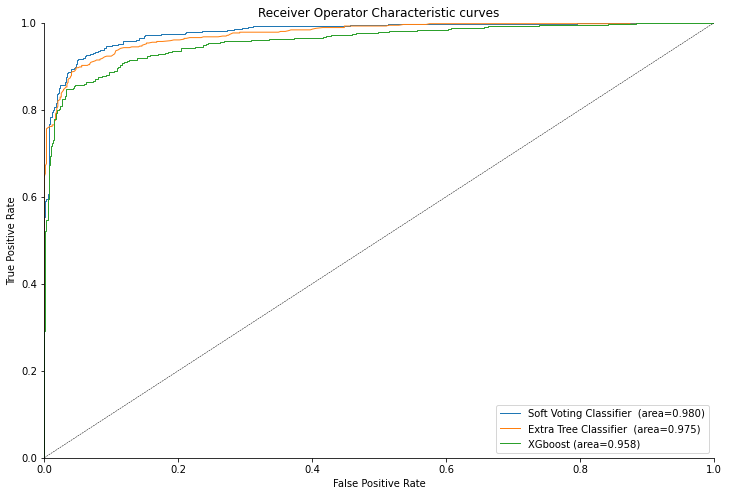

In [141]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test,soft_voting_clf.predict_proba(X_test),label='Soft Voting Classifier ',l='-')
roc_auc_plot(y_test,et_500.predict_proba(X_test),label='Extra Tree Classifier ',l='-')
roc_auc_plot(y_test,xgb.predict_proba(X_test),label='XGboost',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()

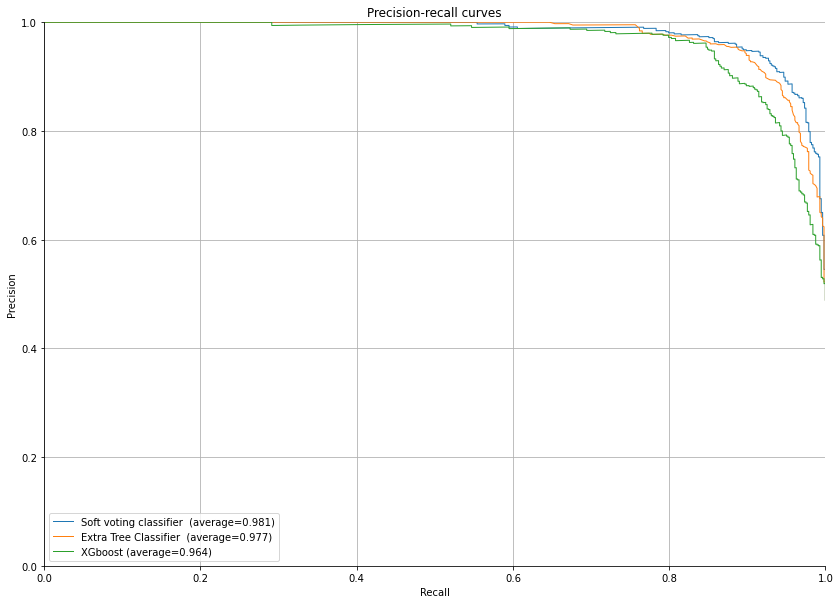

In [142]:
def precision_recall_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import precision_recall_curve, average_precision_score
    precision, recall, _ = precision_recall_curve(y_test,
                                                  y_proba[:,1])
    average_precision = average_precision_score(y_test, y_proba[:,1],
                                                     average="micro")
    ax.plot(recall, precision, label='%s (average=%.3f)'%(label,average_precision),
            linestyle=l, linewidth=lw)

f, ax = plt.subplots(figsize=(14,10))
precision_recall_plot(y_test,soft_voting_clf.predict_proba(X_test),label='Soft voting classifier ',l='-')
precision_recall_plot(y_test,et_500.predict_proba(X_test),label='Extra Tree Classifier ',l='-')
precision_recall_plot(y_test,xgb.predict_proba(X_test),label='XGboost',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-recall curves')
sns.despine()

<AxesSubplot:>

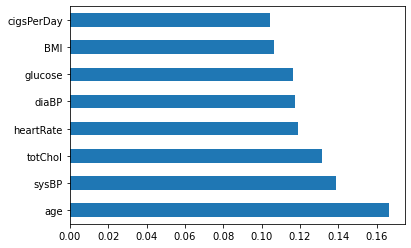

In [143]:
feat_importances = pd.Series(et_500.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [144]:
# now we will save this model into pickle file

import pickle
 
# Save the trained model as a pickle file.
et_500_clf_saved_model = pickle.dumps(et_500)
 
# Load the pickled model
et_500_clf_from_pickle = pickle.loads(et_500_clf_saved_model)
 
# Use the loaded pickled model to make predictions
et_500_clf_from_pickle.predict(X_test)

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [145]:
from joblib import Parallel, delayed
import joblib
 
 
# Save the model as a pickle in a file
joblib.dump(et_500, 'et_500_chd_joblib')
 
# Load the model from the file
et_500_chd_from_joblib = joblib.load('et_500_chd_joblib')
 
# Use the loaded model to make predictions
et_500_chd_from_joblib.predict(X_test)

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [146]:
et_500_chd_from_joblib.predict([[0.148148,0.333333,0.388889,0.159722,0.605263,0.252543,0.410256,0.086957]])

array([0], dtype=int64)

In [147]:
y_test

,TenYearCHD
2658,0
1367,1
2890,0
4611,1
5384,1
...,...
5628,1
2103,0
5089,1
3934,1


In [148]:
X_train.columns

Index(['age', 'cigsPerDay', 'BMI', 'totChol', 'heartRate', 'sysBP', 'diaBP',
       'glucose'],
      dtype='object')

In [149]:
pip freeze 

absl-py==1.0.0
alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
anaconda-client @ file:///C:/ci/anaconda-client_1635342725944/work
anaconda-navigator==2.1.1
anaconda-project @ file:///tmp/build/80754af9/anaconda-project_1626085644852/work
anyio @ file:///C:/ci/anyio_1620153135622/work/dist
appdirs==1.4.4
argh==0.26.2
argon2-cffi @ file:///C:/ci/argon2-cffi_1613037869401/work
arrow @ file:///C:/ci/arrow_1617738834352/work
asn1crypto @ file:///tmp/build/80754af9/asn1crypto_1596577642040/work
astroid @ file:///C:/ci/astroid_1628063282661/work
astropy @ file:///C:/ci/astropy_1629829318700/work
astunparse==1.6.3
async-generator @ file:///home/ktietz/src/ci/async_generator_1611927993394/work
atomicwrites==1.4.0
attrs @ file:///tmp/build/80754af9/attrs_1620827162558/work
autopep8 @ file:///tmp/build/80754af9/autopep8_1620866417880/work
Babel @ file:///tmp/build/80754af9/babel_1620871417480/work
backcall @ file:///home/ktietz/src/ci/backcall_1611930011877/work
backports.func

In [151]:
pip install pipreqs

  Using cached pipreqs-0.4.11-py2.py3-none-any.whl (32 kB)
  Using cached yarg-0.1.9-py2.py3-none-any.whl (19 kB)
  Using cached docopt-0.6.2.tar.gz (25 kB)
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13724 sha256=88e962b90b578dded3deb7d5ca7c578c943afcd657fb9fff79fd5d2b252b24e4
  Stored in directory: c:\users\d\appdata\local\pip\cache\wheels\70\4a\46\1309fc853b8d395e60bafaf1b6df7845bdd82c95fd59dd8d2b
Successfully built docopt
Note: you may need to restart the kernel to use updated packages.
